### Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.3)
X.shape, y.shape

((1000, 2), (1000,))

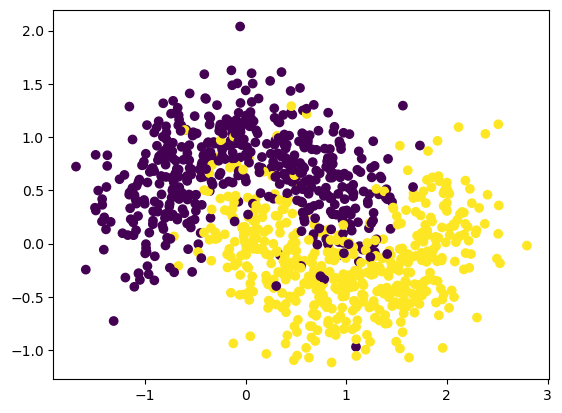

In [3]:
import matplotlib.pyplot as plt
data_x = X[:,0]
data_y = X[:,1]
plt.scatter(X[:, 0], X[:, 1], c=y);

In [4]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_train.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (800, 2))

In [7]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# Create the model
model_moons = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_moons.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
history = model_moons.fit(X_train, y_train, epochs=30)


Epoch 1/30
25/25 [==============================] - 0s 462us/step - loss: 0.6024 - accuracy: 0.6975
Epoch 2/30
25/25 [==============================] - 0s 653us/step - loss: 0.4205 - accuracy: 0.8125
Epoch 3/30
25/25 [==============================] - 0s 530us/step - loss: 0.3331 - accuracy: 0.8525
Epoch 4/30
25/25 [==============================] - 0s 702us/step - loss: 0.3196 - accuracy: 0.8575
Epoch 5/30
25/25 [==============================] - 0s 466us/step - loss: 0.3166 - accuracy: 0.8637
Epoch 6/30
25/25 [==============================] - 0s 503us/step - loss: 0.3078 - accuracy: 0.8675
Epoch 7/30
25/25 [==============================] - 0s 497us/step - loss: 0.3105 - accuracy: 0.8562
Epoch 8/30
25/25 [==============================] - 0s 493us/step - loss: 0.3037 - accuracy: 0.8725
Epoch 9/30
25/25 [==============================] - 0s 469us/step - loss: 0.3071 - accuracy: 0.8737
Epoch 10/30
25/25 [==============================] - 0s 467us/step - loss: 0.3014 - accuracy: 0.8712

In [8]:
# Evaluate
model_moons.evaluate(X_test, y_test)

7/7 [==============================] - 0s 596us/step - loss: 0.2845 - accuracy: 0.8950


[0.28449520468711853, 0.8949999809265137]

In [9]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 269us/step
doing binary classifcation...


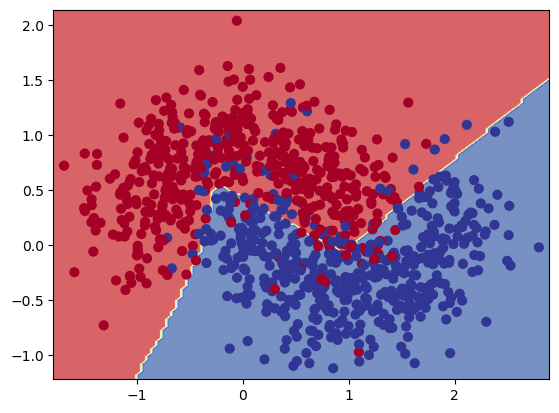

In [10]:
plot_decision_boundary(model_moons, X, y)

### Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [39]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_fashion_data, train_fashion_labels), (test_fashion_data, test_fashion_labels) = fashion_mnist.load_data()

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

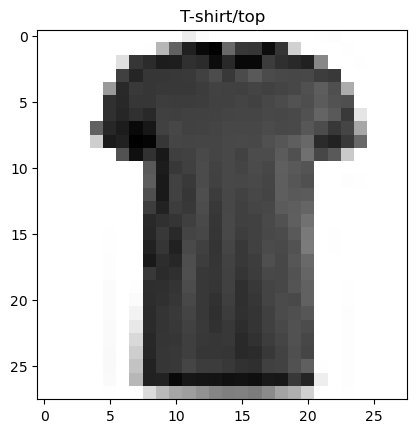

In [41]:
# Plot an example image and its label
plt.imshow(train_fashion_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_fashion_labels[17]]);

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_fashion = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_fashion.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_fashion.fit(train_fashion_data,
                               train_fashion_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_fashion_data, test_fashion_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 1s 472us/step - loss: 2.3707 - accuracy: 0.1494 - val_loss: 1.8236 - val_accuracy: 0.2208 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 462us/step - loss: 1.7306 - accuracy: 0.2618 - val_loss: 1.6809 - val_accuracy: 0.2922 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 437us/step - loss: 1.6427 - accuracy: 0.2998 - val_loss: 1.6351 - val_accuracy: 0.2942 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 436us/step - loss: 1.5998 - accuracy: 0.3088 - val_loss: 1.5802 - val_accuracy: 0.3138 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 432us/step - loss: 1.5812 - accuracy: 0.3142 - val_loss: 1.5746 - val_accuracy: 0.3195 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 445us/step - loss: 1.4843 - accuracy: 0.3665 - val_loss: 1.4380 - val_accuracy: 0.3918 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

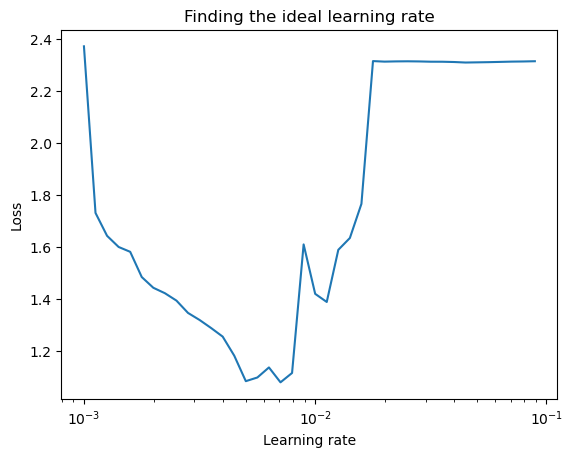

In [43]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [44]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_fashion2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_fashion2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), # ideal learning rate (default is 0.001)
                 metrics=["accuracy"])

# Fit the model
history = model_fashion2.fit(train_fashion_data,
                       train_fashion_labels,
                       epochs=20,
                       validation_data=(test_fashion_data, test_fashion_labels))

Epoch 1/20
1875/1875 [==============================] - 1s 490us/step - loss: 2.3455 - accuracy: 0.2908 - val_loss: 1.5372 - val_accuracy: 0.3860
Epoch 2/20
1875/1875 [==============================] - 1s 464us/step - loss: 1.4643 - accuracy: 0.3992 - val_loss: 1.3745 - val_accuracy: 0.4251
Epoch 3/20
1875/1875 [==============================] - 1s 479us/step - loss: 1.3507 - accuracy: 0.4460 - val_loss: 1.2275 - val_accuracy: 0.4988
Epoch 4/20
1875/1875 [==============================] - 1s 472us/step - loss: 1.1923 - accuracy: 0.5185 - val_loss: 1.1184 - val_accuracy: 0.5379
Epoch 5/20
1875/1875 [==============================] - 1s 477us/step - loss: 1.0755 - accuracy: 0.5610 - val_loss: 1.0800 - val_accuracy: 0.5742
Epoch 6/20
1875/1875 [==============================] - 1s 458us/step - loss: 1.0402 - accuracy: 0.5711 - val_loss: 1.0223 - val_accuracy: 0.5853
Epoch 7/20
1875/1875 [==============================] - 1s 435us/step - loss: 0.9911 - accuracy: 0.5935 - val_loss: 0.9888 -

In [45]:
# Convert all of the predictions from probabilities to labels
y_preds = model_fashion2.predict(test_fashion_data).argmax(axis=1)

313/313 [==============================] - 0s 291us/step


In [46]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_fashion_labels,
                 y_pred=y_preds)

array([[ 51,   0, 881,  49,   5,   1,   0,   0,  13,   0],
       [  3, 891,  20,  84,   1,   0,   0,   0,   1,   0],
       [ 10,   0, 974,   7,   0,   0,   0,   0,   9,   0],
       [ 84,   2, 173, 728,   6,   0,   1,   0,   6,   0],
       [ 23,   0, 938,  26,   0,   0,   2,   0,  11,   0],
       [ 10,   0,   1,   0,   0, 815,   0,  75,  12,  87],
       [ 31,   0, 921,  25,   7,   0,   2,   0,  14,   0],
       [  0,   0,   0,   0,   0,  18,   0, 949,   9,  24],
       [ 15,   0,  42,   5,   0,   2,   0,   7, 929,   0],
       [  0,   0,   1,   0,   0,  22,   0,  86,   0, 891]])